In [1]:
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

In [13]:
#update to W
def l1_mult_update(X, W, H): 
    m,n = np.shape(X)
    _,k = np.shape(W)
    
    X_approx = W@H
    res_mat = np.abs(X - X_approx)
    
    new_W = (W/((W@H@H.transpose())/(res_mat@np.ones(np.shape(H.transpose())))))*((X@H.transpose())/(res_mat@np.ones(np.shape(H.transpose()))))
    
    '''new_W = np.zeros(np.shape(W))
    for s in range(m):
        for t in range(k):
            if res_mat[s,t] == 0:
                print(s,t)
            #new_W[s,t] = W[s,t]*np.sum(X[s,:]/(res_mat[s,:]))/(np.sum(X_approx[s,:]*H[t,:]/(res_mat[s,:]+1e-10))+1e-10)
            denom1 = np.maximum(1e-10,np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            #denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
            term2 = np.maximum(1e-10,np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            #term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
            new_W[s, t] = (W[s, t]/denom1)*(term2)
            #if denom1 < 1e-6:
            #    print ("here")
            #    print ("entry", s, t, "has denom1 = 0.")
            #if term2 < 1e-6:
            #    print ("here")
            #    print ("entry", s, t, "has term2 = 0.")
    '''
            
    return new_W

In [24]:
def l1_mult_updates(X,k,max_iter,W,H):
    m,n = np.shape(X)
    #W = np.random.rand(m,k)
    #H = np.random.rand(k,n)
    
    for t in range(max_iter):
        #print("iteration",t)
        W = l1_mult_update(X,W,H)
        H = l1_mult_update(X.transpose(),H.transpose(),W.transpose()).transpose()
        
    return W,H

In [54]:
X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

print(np.linalg.norm(X-W@H,1))

W,H = l1_mult_updates(X,k,100,W,H)

print(np.linalg.norm(X-W@H,1))

3562.053419558396
245.1247051776792


In [55]:
errs = []

X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 10

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

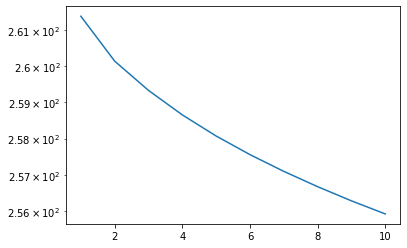

In [56]:
plt.semilogy(range(1,num_iters+1),errs)

In [67]:
errs = []

k = 10
X = np.random.rand(1000,k)@np.random.rand(k,100)

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 100

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

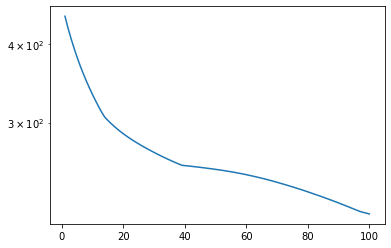

In [68]:
plt.semilogy(range(1,num_iters+1),errs)

## Sanity Checks

In [40]:
errs = []
k = 10
W_opt = np.random.rand(1000,k)
H_opt = np.random.rand(k,100)

X = W_opt@H_opt

init_noise = 1e-10

#W = W_opt + init_noise*(np.random.rand(1000,k)<0.1)
#H = H_opt + init_noise*(np.random.rand(k,100)<0.1)

W_opt[2, 5] += .05
H_opt [5, 25] += .1

num_iters = 1000

for i in range(num_iters):
    W_opt,H_opt = l1_mult_updates(X,k,1,W_opt,H_opt)
    #if denom1 == 1e-10:
     #   print ("entry", s, t, "has denom1 = 0.")
    #if term2 == 1e-10:
     #   print ("entry", s, t, "has term2 = 0.")
        

    errs.append(np.linalg.norm(X-W_opt@H_opt,1))

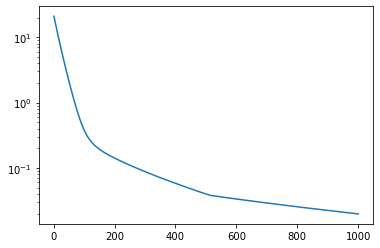

In [41]:
plt.semilogy(range(1,num_iters+1),errs)

In [42]:
errs

[20.963055262791,
 19.919677922150033,
 18.914352844040422,
 17.965436204922106,
 17.069551464779977,
 16.223780321032848,
 15.424420951684587,
 14.668496163433826,
 13.953347669013393,
 13.276503540509085,
 12.635722448082761,
 12.029162664849245,
 11.454505062538134,
 10.91012139194476,
 10.394189635596739,
 9.905226580395997,
 9.441358298867337,
 9.001271338322955,
 8.583546039778401,
 8.186801326446137,
 7.8099410683208585,
 7.4518056338830245,
 7.111384798398905,
 6.787930686490399,
 6.48039627808474,
 6.1878418088311955,
 5.909501299308774,
 5.644650734866924,
 5.392576247087046,
 5.152833292963029,
 4.924851879472519,
 4.708056324223504,
 4.501566424264609,
 4.304984988791119,
 4.117785653885855,
 3.9394081253945568,
 3.769285871488049,
 3.607009199812448,
 3.4522943436255824,
 3.304764995783335,
 3.164064472525122,
 3.0298744270869213,
 2.901807007678569,
 2.7796278231241214,
 2.662977124779879,
 2.551694972515215,
 2.445453639600782,
 2.3440313859423756,
 2.247268863127214,
 2

## Confirmation of Hand Calculation

In [24]:
x = [0, 1, 1, 0, 3, 4, 6, -1, 0, 1]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
z = 0

for i in np.argwhere(x):
  z += y[i.item()]

print(z)


41


In [9]:
X = np.array([[1, 2, 1], 
              [3, 0, 2], 
              [1, 1, 4]])

W = np.array([[1, 2],
              [0, 1],
              [2, 1]])

H = np.array([[1, 1, 3],
              [0, 2, 2]])

X_approx = W@H
res_mat = np.abs(X - X_approx)
new_W = np.zeros(np.shape(W))
h1 = np.ones(np.shape(H.transpose()))

m = 3
n = 3
k = 2

s = 2
t = 0

for s in range(m):
    for t in range (k):
        denom1 = 0
        term2 = 0
        #for j in np.argwhere(res_mat[s,:]):
        #    denom1 += (X_approx[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        #    term2 += (X[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        new_W[s, t] = (W[s, t]/denom1)*(term2)

print(new_W)


new_W_2 = (W/((W@H@H.transpose())/(res_mat@h1)))*((X@H.transpose())/(res_mat@h1))

print(new_W_2)



[[0.22580645 0.58823529]
 [0.         0.        ]
 [0.92857143 0.4       ]]
[[0.22222222 0.5       ]
 [0.         0.5       ]
 [0.93333333 0.41666667]]


In [4]:
X_approx[s,np.argwhere(res_mat[s,:])]

array([[2],
       [4],
       [8]])

In [6]:
np.ones(np.shape(H))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [6]:
t

1

In [ ]:
#test changes